<div class="alert alert-success">
    
## Машинное обучение

## Практическое домашнее задание 3




# Для выполнения домашнего задания №3:

В этом задании вам следует обучить две модели: Логистическая регрессия, RandomForest. По всем обученным моделям должен быть проведен подбор параметров, и, при необходимости, применены инструменты для борьбы с переобучением.
 В качестве основной метрики, с помощью которой следует сравнивать производительность моделей, использовать площадь под ROC-кривой (AUC-ROC).
 Перед выполнением всех экспериментов и выбора лучшей модели, определите как вы будете оценивать качество: на тестовых данных, которые могут быть получены с помощью кросс-валидации или предварительно отобранной тестовой выборки из таблицы `features.csv`.
Не забываем, что в любом случае подбор гиперпараметров должен проводиться на кроссвалидации. После того, как найдете лучшие гиперпараметры с помощью GridSearch, инициализируйте модель с найденными лучшими гиперпараметрами. 

Для решения задания вам требуется выполнить следующие шаги:

1. Проведите EDA, не забудьте масштабировать данные, если это требуется. (1 балл)
2. Оцените качество моделей с помощью кросс-валидации, подберите при этом лучшие параметры. (2 балла, каждый по 0.5 с учётом ответов на вопросы)
  - Как долго проводилась кросс-валидация каждой выбранной вами модели? Инструкцию по измерению времени можно найти ниже по тексту.
  - Какое качество при этом получилось? В данном задании мы используем метрику качества AUC-ROC.
  - Как оно соотносится с качеством другой модели? Чем вы можете объяснить эту разницу?
  - Быстрее ли работает, Случайный лес по сравнению с Логистической регрессией? Время замерьте с помощью кода ниже.

3. Постройте предсказания вероятностей получения положительного класса для тестовой выборки с помощью лучшей из изученных моделей (лучшей с точки зрения AUC-ROC на кросс-валидации). Убедитесь, что предсказанные вероятности адекватные — находятся на отрезке [0, 1], не совпадают между собой (т.е. модель не получилась константной).  (1 балл)

4. В качестве метрики использовать площадь под ROC-кривой (AUC-ROC). Построить матрицу ошибок (Confusion Matrix). (1 балл)
5. Как правило исходно в задачах автоматически используется порог (threshold) равный 0.5, но мы можем его менять. (3 балла)

    - Как увеличение порога отразится на precision/recall?  
    На практике, перед нами всегда встает trade-off: уменьшить полноту взамен на большую точность или получить больше ложно положительных примеров взамен на больший recall.
    - Постройте на одном графике precision, recall и f1 score в зависимости от порога.
    - Найдите порог, который соответствует максимизации f1 score.

6.  Провести интерпретацию признаков с помощью `_features_importances/permutation_importance`, постройте bar plot. На основе полученных результатов описать выводы. (2 балла)  


**Обратите внимание**: высокое качество работы на кросс-валидации (близкое к 100\%) — это в первую очередь повод задуматься о том, правильно ли вы обучаете модель. Например, возможно, вы заглядываете в будущее.

*Немного о метрике качества:*

 `AUC-ROC` — это метрика качества для алгоритма, выдающего оценки принадлежности первому классу. Все три алгоритма — случайный лес, SVM и логистическая регрессия — умеют выдавать такие оценки. Для этого нужно получать предсказания с помощью функции predict\_proba. Эта функция возвращает два столбца: первый содержит оценки принадлежности нулевому классу, второй — первому классу. Вам нужны значения из второго столбца:

```
pred = model.predict_proba(X_test)[:, 1]
```

**Измерение времени работы кода**
```  
import time
import datetime

start_time = datetime.datetime.now()

time.sleep(3) # place the piece of code to be measured here

print 'Time elapsed:', datetime.datetime.now() - start_time
```

**Рекомендации и советы**

Если все работает очень медленно:

  - Используйте для обучения и кросс-валидации не всю выборку, а некоторое ее подмножество — например, половину объектов. Подмножество лучше всего брать случайным, а не формировать его из первых m объектов.
  - Попробуйте упростить модель — например, уменьшить глубину деревьев в (max\_depth).

# Описание задачи

## Предметная область: Игра Dota 2

[Dota 2](https://ru.wikipedia.org/wiki/Dota_2) — многопользовательская компьютерная игра жанра [MOBA](https://ru.wikipedia.org/wiki/MOBA). Игроки играют между собой матчи. В каждом матче участвует две команды, 5 человек в каждой. Одна команда играет за светлую сторону (The Radiant), другая — за тёмную (The Dire). Цель каждой команды — уничтожить главное здание базы противника (трон).

Существуют [разные режимы игры](http://dota2.gamepedia.com/Game_modes/ru), мы будем рассматривать режим [Captain's Mode](http://dota2.gamepedia.com/Game_modes/ru#Captain.27s_Mode), в формате которого происходит большая часть киберспортивных мероприятий по Dota 2.

### Как проходит матч

#### 1. Игроки выбирают героев

Всего в игре чуть более 100 различных героев (персонажей). В начале игры, команды в определенном порядке выбирают героев себе и запрещают выбирать определенных героев противнику (баны). Каждый игрок будет управлять одним героем, в рамках одного матча не может быть несколько одинаковых героев.  Герои различаются между собой своими характеристиками и способностями. От комбинации выбранных героев во многом зависит успех команды.

![](http://imgur.com/XFr4HYE.jpg)

#### 2. Основная часть

Игроки могут получать золото и опыт за убийство чужих героев или прочих юнитов. Накопленный опыт влияет на уровень героя, который в свою очередь позволяет улучшать способности. За накопленное золото игроки покупают предметы, которые улучшают характеристики героев или дают им новые способности.

После смерти герой отправляется в "таверну" и возрождается только по прошествии некоторого времени, таким образом команда на некоторое время теряет игрока, однако игрок может досрочно выкупить героя из таверны за определенную сумму золота.

В течение игры команды развивают своих героев, обороняют свою часть поля и нападают на вражескую.

![](http://imgur.com/5b0SlQb.jpg)

#### 3. Конец игры

Игра заканчивается, когда одна из команд разрушет определенное число "башен" противника и уничтожает трон.

![](http://imgur.com/Du79Kzf.jpg)

Признаки, представленные в таблице features.csv, по мнению экспертов в предметной области являются наиболее важными для решения задачи предсказания победы команды. Тем не менее, не обязательно использовать эти признаки в исходном виде для применения методов машинного обучения — вы можете сделать новые признаки из имеющихся.

*Материал частично базируется на задаче по соревнованию Kaggle Dota 2 Win Probability Prediction, проводимом в рамках проекта курса по Машинному Обучению на платформе Coursera.*

### Пример чтения файла с признаками

In [19]:
import pandas as pd

features = pd.read_csv('./features.csv', index_col='match_id')

features

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114402,1450265551,1,47,4,1706,1198,17,0,1,8,...,4,3,0,-24.0,2032,0,1792,1975,48,63
114403,1450277704,0,43,4,1793,1416,17,0,1,5,...,3,2,0,-17.0,1734,1,2038,6,63,3
114404,1450291848,1,98,4,1399,540,1,0,0,5,...,1,3,1,-15.0,2906,0,1796,1846,51,63


In [43]:
# print(list(features.columns)
# )

for column in features.columns:
    print(column)

start_time
lobby_type
r1_hero
r1_level
r1_xp
r1_gold
r1_lh
r1_kills
r1_deaths
r1_items
r2_hero
r2_level
r2_xp
r2_gold
r2_lh
r2_kills
r2_deaths
r2_items
r3_hero
r3_level
r3_xp
r3_gold
r3_lh
r3_kills
r3_deaths
r3_items
r4_hero
r4_level
r4_xp
r4_gold
r4_lh
r4_kills
r4_deaths
r4_items
r5_hero
r5_level
r5_xp
r5_gold
r5_lh
r5_kills
r5_deaths
r5_items
d1_hero
d1_level
d1_xp
d1_gold
d1_lh
d1_kills
d1_deaths
d1_items
d2_hero
d2_level
d2_xp
d2_gold
d2_lh
d2_kills
d2_deaths
d2_items
d3_hero
d3_level
d3_xp
d3_gold
d3_lh
d3_kills
d3_deaths
d3_items
d4_hero
d4_level
d4_xp
d4_gold
d4_lh
d4_kills
d4_deaths
d4_items
d5_hero
d5_level
d5_xp
d5_gold
d5_lh
d5_kills
d5_deaths
d5_items
first_blood_time
first_blood_team
first_blood_player1
first_blood_player2
radiant_bottle_time
radiant_courier_time
radiant_flying_courier_time
radiant_tpscroll_count
radiant_boots_count
radiant_ward_observer_count
radiant_ward_sentry_count
radiant_first_ward_time
dire_bottle_time
dire_courier_time
dire_flying_courier_time
dire

In [20]:
# выкидываем бесполезные признаки
features = features.drop(['barracks_status_dire',
                      'barracks_status_radiant', 
                      'duration',
                      'tower_status_dire',
                      'tower_status_radiant',
                        'radiant_first_ward_time',
                        'dire_first_ward_time',
                                                                    'start_time',
                                                                    'lobby_type',
], axis=1, errors='ignore')


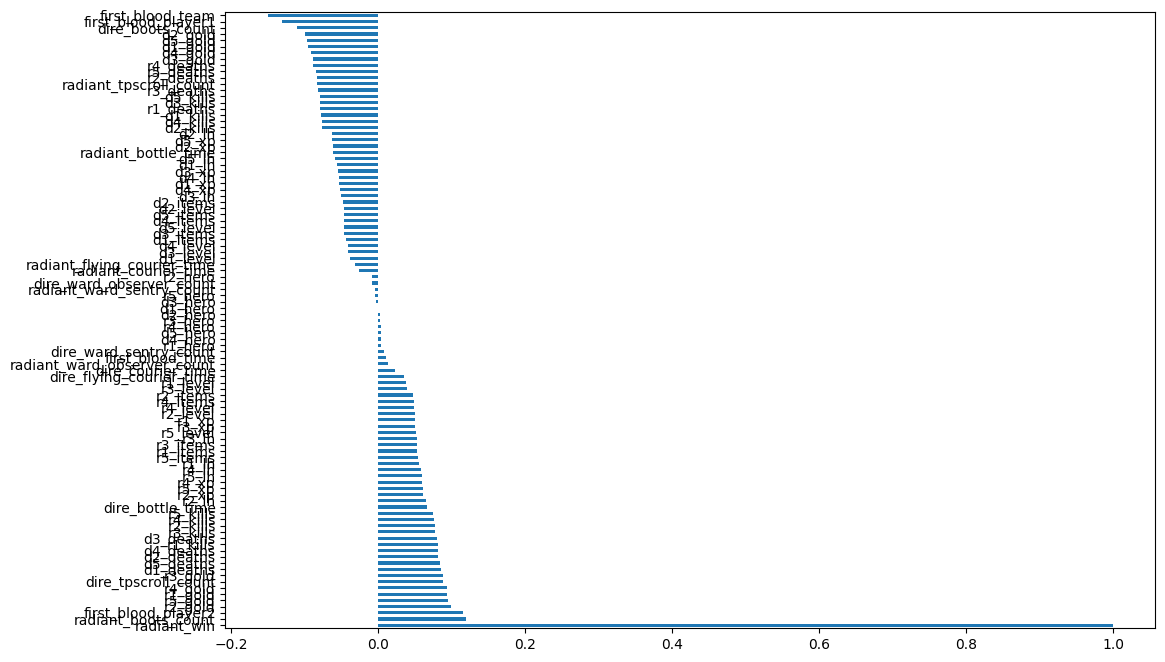

In [46]:
features.corrwith(features['radiant_win']) \
             .sort_values(ascending=False)  \
             .plot.barh(figsize=(12, 8))

In [21]:
# Код для улучшения визуализации
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

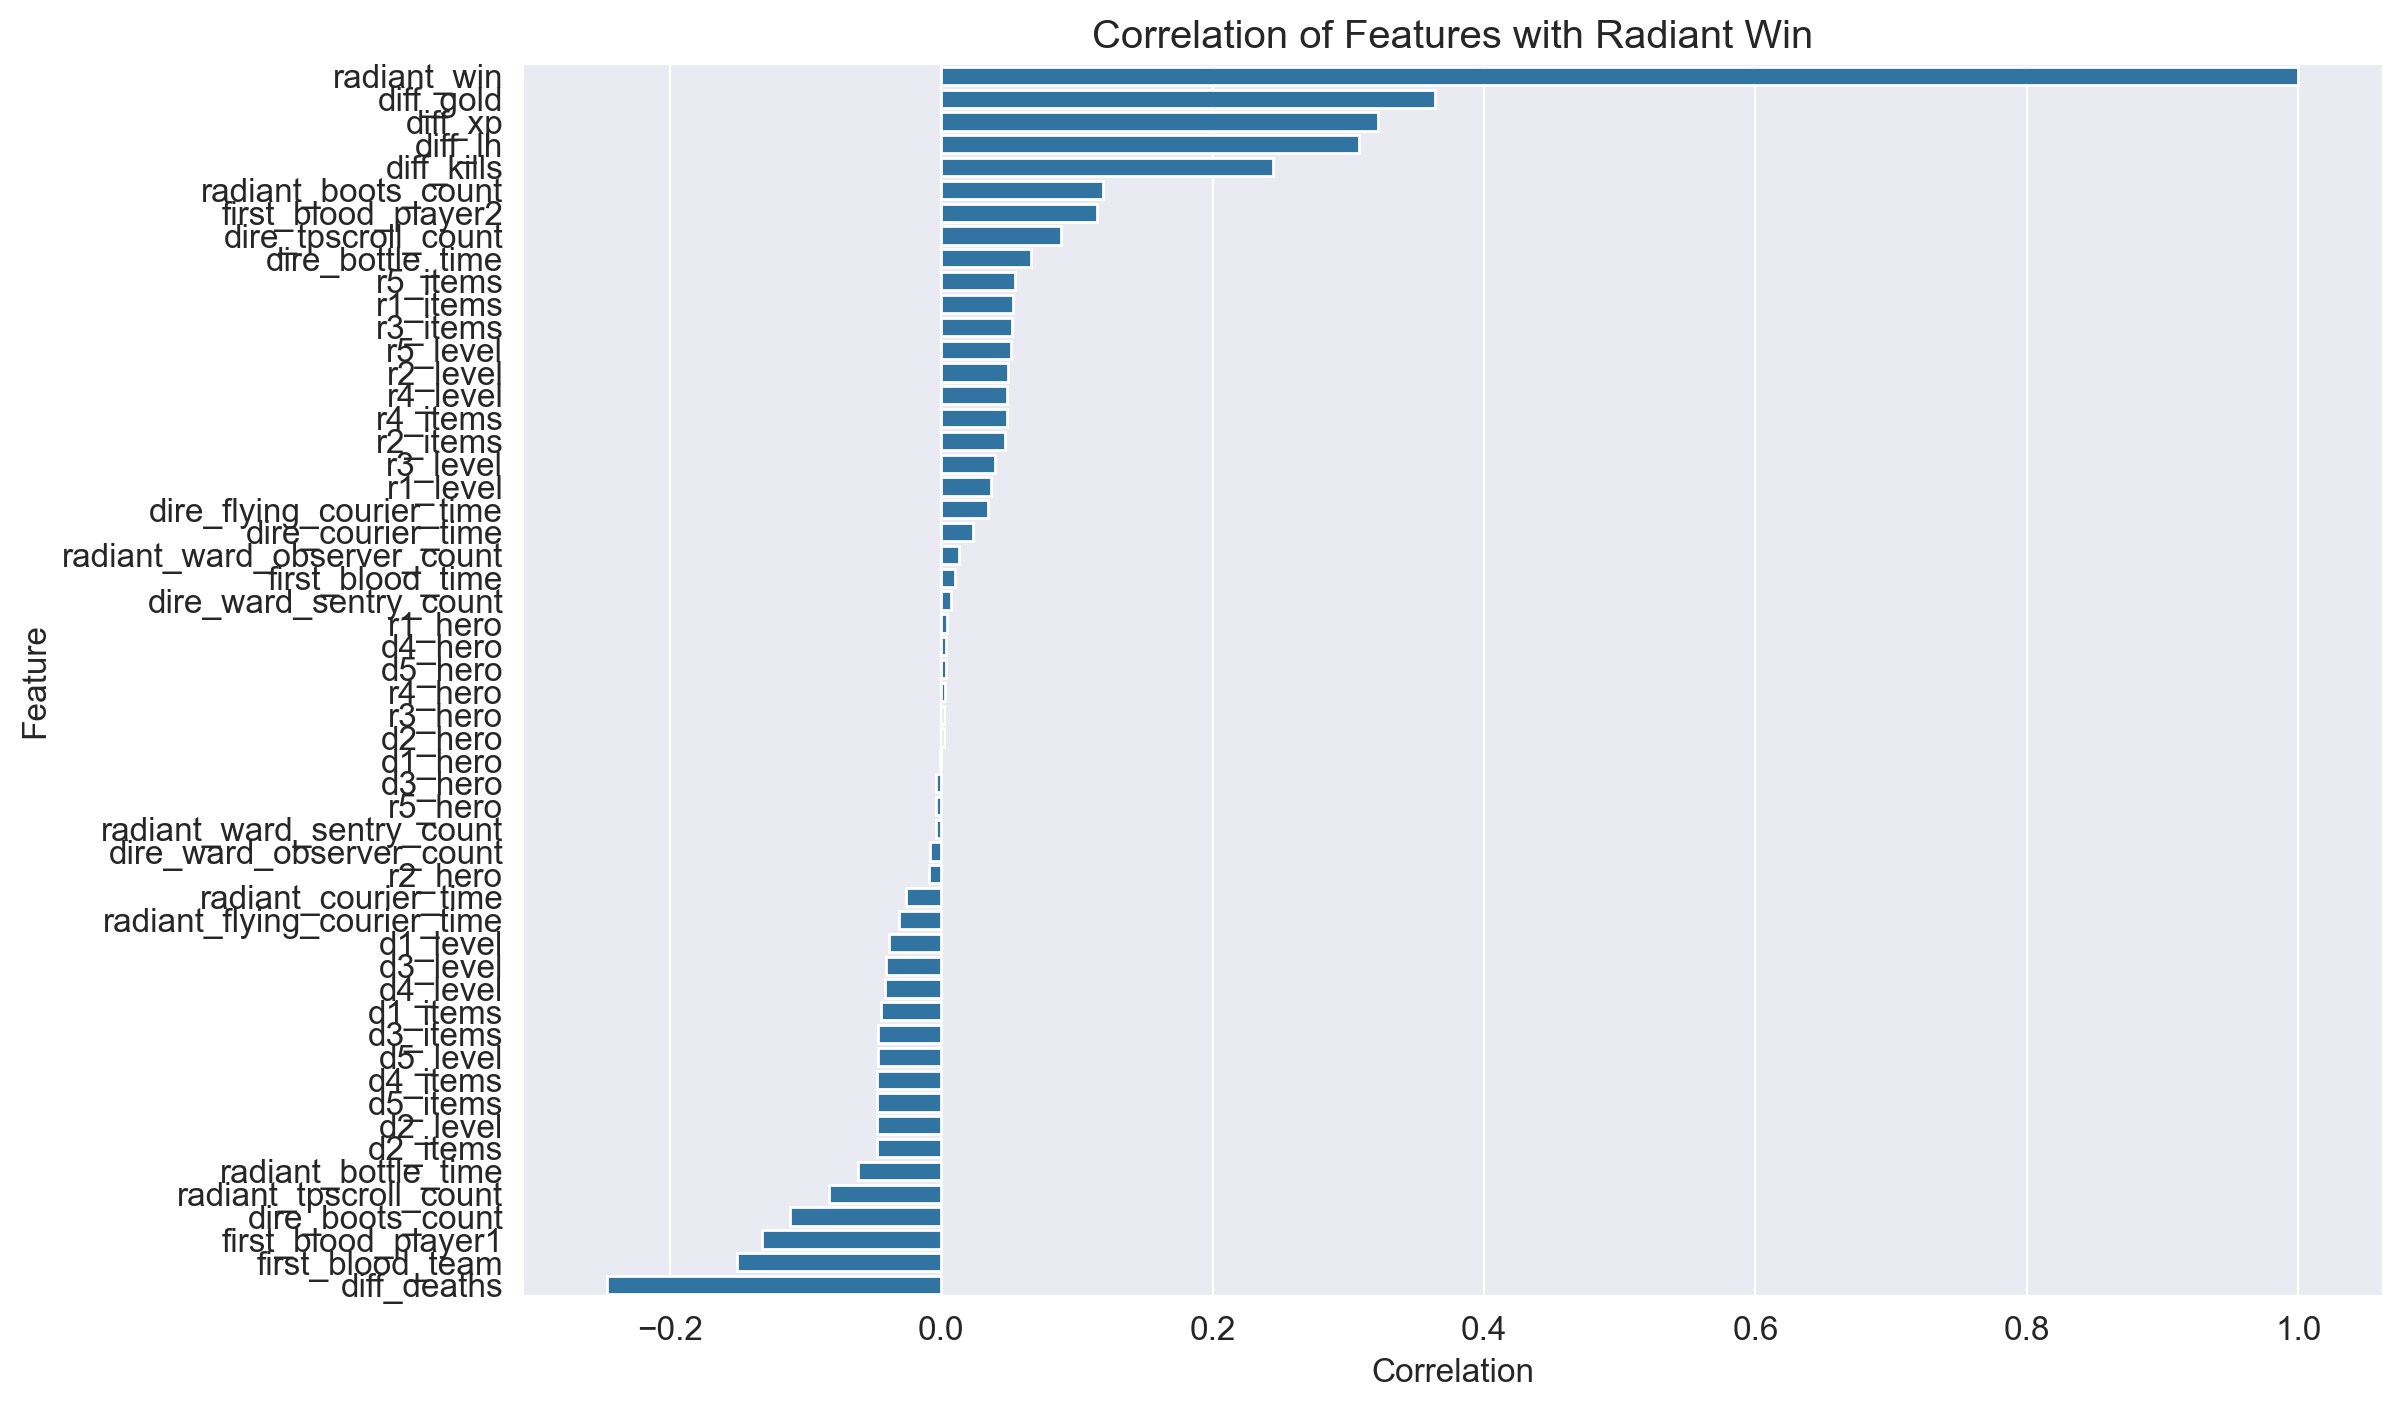

In [18]:

# Вычисление корреляции между признаками и столбцом 'radiant_win'
correlation = features.corrwith(features['radiant_win'])

# Создание датафрейма для корреляции
correlation_df = pd.DataFrame({'Feature': correlation.index, 'Correlation': correlation.values})

# Сортировка по убыванию значения корреляции
correlation_df_sorted = correlation_df.sort_values(by='Correlation', ascending=False)

# Построение графика с использованием Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Correlation', y='Feature', data=correlation_df_sorted, orient='h')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.title('Correlation of Features with Radiant Win')
plt.show()


In [52]:
def aggregate_team_stats(df, drop_old=True):
    # Список показателей
    metrics = ['xp', 'gold', 'lh', 'kills', 'deaths', 'items']

    for metric in metrics:
        # Создаём новые столбцы для каждой команды и метрики
        df['r_' + metric] = sum(df[f'r{i}_{metric}'] for i in range(1, 6))
        df['d_' + metric] = sum(df[f'd{i}_{metric}'] for i in range(1, 6))
    
        # Опционально: удаление старых столбцов
        if drop_old:
            for i in range(1, 6):
                df.drop([f'r{i}_{metric}', f'd{i}_{metric}'], axis=1, inplace=True)

    return df

aggregate_team_stats(features)

,r1_hero,r1_level,r2_hero,r2_level,r3_hero,r3_level,r4_hero,r4_level,r5_hero,r5_level,...,r_gold,d_gold,r_lh,d_lh,r_kills,d_kills,r_deaths,d_deaths,r_items,d_items
match_id,,,,,,,,,,,,,,,,,,,,,
0,11,5,67,3,29,5,20,3,105,3,...,5022,5021,50,52,0,1,1,0,37,33
1,42,4,49,4,67,4,37,3,26,2,...,4698,5505,45,43,1,2,2,1,38,41
2,33,4,98,3,20,3,27,5,4,3,...,6677,5786,81,70,2,1,1,2,39,42
3,29,4,30,2,75,5,37,2,41,3,...,4308,4729,42,51,0,0,0,0,29,37
4,13,4,27,2,30,3,72,3,93,4,...,4888,5068,31,46,3,1,1,3,42,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114402,47,4,7,2,1,3,21,4,71,3,...,5448,6517,51,42,2,6,6,2,41,40
114403,43,4,26,3,4,3,29,4,110,3,...,5508,5080,46,29,3,3,3,3,38,38
114404,98,4,11,4,112,3,81,4,50,2,...,5064,5397,45,61,1,1,1,1,49,40


In [22]:
import pandas as pd

def aggregate_team_stats_with_difference(df, drop_old=True):
    # Список всех показателей
    all_metrics = ['gold', 'xp', 'lh', 'kills', 'deaths']

    for metric in all_metrics:
        # Вычисление разницы между командами для каждой метрики
        df['diff_' + metric] = sum(df[f'r{i}_{metric}'] for i in range(1, 6)) - sum(df[f'd{i}_{metric}'] for i in range(1, 6))

        # Удаление старых столбцов
        if drop_old:
            for i in range(1, 6):
                df.drop([f'r{i}_{metric}', f'd{i}_{metric}'], axis=1, inplace=True)

    return df

# Пример использования
features_agr = aggregate_team_stats_with_difference(features)


In [55]:
team_features_names = list(set([name.replace('radiant_', '').replace('dire_', '') for name in features.columns]))

print(team_features_names)

def get_team_features_diff(dataframe):
    team_features_diff = pd.DataFrame()
    
    for feature in team_features_names:
        team_features_diff['{}_diff'.format(feature)] = dataframe['radiant_{}'.format(feature)] - \
                                                        dataframe['dire_{}'.format(feature)]
    return team_features_diff

features = get_team_features_diff(features)

['r4_hero', 'r2_level', 'd2_hero', 'r_gold', 'r_xp', 'r_lh', 'first_blood_player1', 'd1_hero', 'r3_level', 'ward_sentry_count', 'first_blood_team', 'ward_observer_count', 'r3_hero', 'r1_level', 'd_gold', 'bottle_time', 'first_blood_player2', 'd_deaths', 'd4_level', 'tpscroll_count', 'd_xp', 'r5_hero', 'r_kills', 'd5_hero', 'first_blood_time', 'd3_level', 'r_items', 'win', 'courier_time', 'r_deaths', 'd_lh', 'd1_level', 'd4_hero', 'd2_level', 'd_kills', 'boots_count', 'r5_level', 'r1_hero', 'r2_hero', 'r4_level', 'd_items', 'd5_level', 'flying_courier_time', 'd3_hero']


KeyError: 'radiant_r4_hero'

In [40]:
# show max number of column towers_status_radiant
print(features['r1_gold'].max())
print(features['r2_gold'].max())
print(features['r3_gold'].max())
print(features['r4_gold'].max())
print(features['r5_gold'].max())



4332
4136
3740
3782
3840


In [ ]:
features = features.fillna(0)

In [24]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.preprocessing import StandardScaler

# Предполагается, что у вас есть DataFrame df с признаками и целевая переменная 'target'

# Разделение данных на признаки и целевую переменную
X = features.drop('radiant_win', axis=1)
y = features['radiant_win']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание модели логистической регрессии
log_reg = LogisticRegression()

# Определение параметров для GridSearch
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Создание объекта GridSearch с использованием AUC-ROC в качестве метрики
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring=make_scorer(roc_auc_score))

# Обучение модели
grid_search.fit(X_train_scaled, y_train)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

# Предсказание на тестовых данных
y_pred = grid_search.predict(X_test_scaled)

# Расчет AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)


ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\roman\Documents\Sirius\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\roman\Documents\Sirius\.venv\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\roman\Documents\Sirius\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\roman\Documents\Sirius\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.

--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\roman\Documents\Sirius\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\roman\Documents\Sirius\.venv\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\roman\Documents\Sirius\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1201, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\roman\Documents\Sirius\.venv\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\roman\Documents\Sirius\.venv\Lib\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\roman\Documents\Sirius\.venv\Lib\site-packages\sklearn\utils\validation.py", line 1049, in check_array
    _assert_all_finite(
  File "c:\Users\roman\Documents\Sirius\.venv\Lib\site-packages\sklearn\utils\validation.py", line 126, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "c:\Users\roman\Documents\Sirius\.venv\Lib\site-packages\sklearn\utils\validation.py", line 175, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [60]:
print(features['first_blood_time'].min())

-78.0


In [32]:
counts = features['d5_items'].value_counts()

print(counts)

d5_hero
7      4321
112    3759
50     3757
72     3374
11     3023
       ... 
80       69
66       61
103      61
58       55
109      13
Name: count, Length: 108, dtype: int64


In [34]:
hero_columns = ['r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', 'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero']

# Собираем значения всех столбцов с героями в один список
all_heroes = []
for column in hero_columns:
    all_heroes.extend(features[column])

# Подсчет количества уникальных ID героев
unique_heroes = len(set(all_heroes))

print("Количество уникальных героев:", unique_heroes)

Количество уникальных героев: 108


In [14]:
features[features['lobby_type'].isin([1, 7])]

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63
5,1430284186,1,11,5,1961,1461,19,0,1,6,...,4,4,0,-43.0,1453,0,512,2038,0,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114401,1450264638,7,100,2,730,1110,0,2,0,9,...,2,2,1,-9.0,4298,1,1568,4,14,35
114402,1450265551,1,47,4,1706,1198,17,0,1,8,...,4,3,0,-24.0,2032,0,1792,1975,48,63
114404,1450291848,1,98,4,1399,540,1,0,0,5,...,1,3,1,-15.0,2906,0,1796,1846,51,63


##### Описание признаков в таблице

- `match_id`: идентификатор матча в наборе данных
- `start_time`: время начала матча (unixtime)
- `lobby_type`: тип комнаты, в которой собираются игроки (расшифровка в `dictionaries/lobbies.csv`)
- Наборы признаков для каждого игрока (игроки команды Radiant — префикс `rN`, Dire — `dN`):
    - `r1_hero`: герой игрока (расшифровка в dictionaries/heroes.csv)
    - `r1_level`: максимальный достигнутый уровень героя (за первые 5 игровых минут)
    - `r1_xp`: максимальный полученный опыт
    - `r1_gold`: достигнутая ценность героя
    - `r1_lh`: число убитых юнитов
    - `r1_kills`: число убитых игроков
    - `r1_deaths`: число смертей героя
    - `r1_items`: число купленных предметов
- Признаки события "первая кровь" (first blood). Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение
    - `first_blood_time`: игровое время первой крови
    - `first_blood_team`: команда, совершившая первую кровь (0 — Radiant, 1 — Dire)
    - `first_blood_player1`: игрок, причастный к событию
    - `first_blood_player2`: второй игрок, причастный к событию
- Признаки для каждой команды (префиксы `radiant_` и `dire_`)
    - `radiant_bottle_time`: время первого приобретения командой предмета "bottle"
    - `radiant_courier_time`: время приобретения предмета "courier"
    - `radiant_flying_courier_time`: время приобретения предмета "flying_courier"
    - `radiant_tpscroll_count`: число предметов "tpscroll" за первые 5 минут
    - `radiant_boots_count`: число предметов "boots"
    - `radiant_ward_observer_count`: число предметов "ward_observer"
    - `radiant_ward_sentry_count`: число предметов "ward_sentry"
    - `radiant_first_ward_time`: время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть часть игрового поля
- Итог матча (данные поля отсутствуют в тестовой выборке, поскольку содержат информацию, выходящую за пределы первых 5 минут матча)
    - `duration`: длительность
    - `radiant_win`: 1, если победила команда Radiant, 0 — иначе
    - Состояние башен и барраков к концу матча (см. описание полей набора данных)
        - `tower_status_radiant`
        - `tower_status_dire`
        - `barracks_status_radiant`
        - `barracks_status_dire`
      

# Набор данных

Набор данных с матчами записан в файле matches.jsonlines.bz2. В каталоге dictionaries приведены расшифровки идентификаторов, которые присутствуют в записях матчей.

Чтение информации о матчах
Информация о матчах записана в сжатом текстовом файле matches.jsonlines.bz2, каждая строчка которого содержит объект в формате JSON. Запись в формате JSON преобразуется в python-объект при помощи стандартного модуля json. Пример чтения матчей:

In [7]:
import json

f = open("dictionaries/heroes.json")
data = json.load(f)
f.close()

data['14']

{'id': 14,
 'name': 'npc_dota_hero_pudge',
 'localized_name': 'Pudge',
 'primary_attr': 'str',
 'attack_type': 'Melee',
 'roles': ['Disabler', 'Initiator', 'Durable', 'Nuker'],
 'img': '/apps/dota2/images/heroes/pudge_full.png?',
 'icon': '/apps/dota2/images/heroes/pudge_icon.png',
 'base_health': 200,
 'base_health_regen': 1.5,
 'base_mana': 75,
 'base_mana_regen': 0.9,
 'base_armor': -1,
 'base_mr': 25,
 'base_attack_min': 27,
 'base_attack_max': 33,
 'base_str': 25,
 'base_agi': 14,
 'base_int': 14,
 'str_gain': 3.5,
 'agi_gain': 1.5,
 'int_gain': 1.5,
 'attack_range': 150,
 'projectile_speed': 0,
 'attack_rate': 1.7,
 'move_speed': 280,
 'turn_rate': 0.7,
 'cm_enabled': True,
 'legs': 2}